In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [6]:
#Onesided normal percentile point function
#alpha = 0.05    ==>  1-alpha/2 = 0.975
print stats.norm.ppf(0.95)
print stats.t.ppf(0.95,1000)

1.64485362695
1.64637881729


# Laboratory Assignment 1

## Exercise A

#### Question 1: How much time will the download require if all the seeders are used together, given that their individual speeds do not change?

In [3]:
#<your calculations here>
1.0 / (1.0/4.0 + 1.0/7.0 + 1.0/6.0)

1.7872340425531914

#### Question 2: How large was the distribution (in Mbytes)?

In [4]:
#<your calculations here>

# the ammount is downloaded in the first hour with speed of 290Kbps  
S1 = 290*3600*1000
# the ammount is downloaded in the first hour with speed of 253Kbps  
S2 = 253*3600*1000
# the ammount is downloaded in the first hour with speed of 269Kbps
S3 = 269*3600*1000
# the ammount is downloaded in the first hour with speed of 1008Kbps
S4 = 1008*3600*1000

#Total ammount in bit
S = S1 + S2 + S3 + S4
#Total ammount in Mbytes
SM = S/(8.0*pow(2,20))
print SM


781.059265137


## Exercise B

In [8]:
dataset = list()
with open("labdata.dat") as datafile:
    for line in datafile:
        dataset.append(int(line))
    
    
#print dataset
print np.mean(dataset)
onewayRTT = np.mean(dataset)/2.0
print onewayRTT



31.527
15.7635


In [13]:
data_col1 = list()
data_col2 = list()
with open("labdata2.dat") as datafile:
    for line in datafile:
        data_col1.append(int(line.split()[0]))
        data_col2.append(int(line.split()[1]))
print data_col1

print data_col2



[428, 423, 426, 404, 399, 403, 440, 439, 443, 354, 353, 357, 324, 328, 325, 328, 325, 328, 325, 325, 324, 326, 329, 325, 329, 325, 329, 337, 342, 337, 351, 349, 349]
[541, 525, 525, 440, 440, 441, 444, 445, 440, 451, 451, 455, 404, 399, 399, 436, 437, 437, 446, 445, 448, 378, 377, 376, 390, 390, 388, 405, 404, 407, 371, 372, 373]


#### Question 1: How much time, approximately, is required for a message to go from A to B?

In [16]:
print np.mean(dataset)
onewayRTT = np.mean(dataset)/2.0
print onewayRTT

31.527
15.7635


#### Question 2: Considering all values, what seems to be the typical RTT?

In [6]:
RTT = np.mean(dataset)
print RTT

31.527


#### Question 3: Approximately, how much does the RTT vary on average?

In [10]:
stdev = np.std(dataset)
print stdev

19.354463852


#### Question 4: How does the distribution of RTT samples look like?

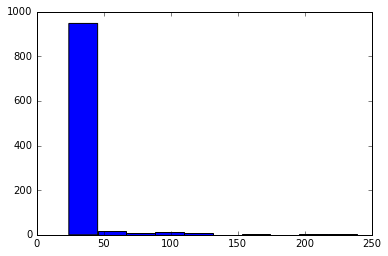

In [48]:
plt.hist(dataset)
plt.show()

#### Question 5: How would you like to describe the shape of the distribution, and why do you think it has this shape?

In [6]:
#<your calculations here>

## Exercise C

#### Question 1: Calculate [c1,c2] for a confidence level of 90%?

In [24]:
def conf_func(X, clevel):
    avg = np.mean(X)
    stdev = np.std(X)
    alpha = 1 - clevel
    n = len(X)
    temp = stats.norm.ppf(1 - alpha/2)*stdev/(pow(n,1/2.0)) #number of measurement = 1000 >> 30

    c1, c2 = avg - temp, avg + temp
    
    return c1, c2

print conf_func(dataset, 0.90)
    
    


(30.520280682916461, 32.533719317083538)


#### Question 2: Calculate [c1,c2] for a confidence level of 95%?

In [12]:
print conf_func(dataset, 0.95)

(30.327419945158617, 32.726580054841385)


#### Question 3: Why is the interval larger for 95% than for a 90% interval? Should not a 95% interval be a more precise measure of the interval containing the "real" value?

In [25]:
print "Confidence Intervals for confidence level of 90%: [c1,c2] = ",conf_func(dataset, 0.90)
print "Confidence Intervals for confidence level of 95%: [c3,c4] = ",conf_func(dataset, 0.95)

Confidence Intervals for confidence level of 90%: [c1,c2] =  (30.520280682916461, 32.533719317083538)
Confidence Intervals for confidence level of 95%: [c3,c4] =  (30.327419945158617, 32.726580054841385)


#### Question 4: Between what values can we expect the "real" transmission time to be? Choose a 95% level of confidence.

In [14]:
print conf_func(data_col1, 0.95)

(351.85107458580217, 365.05801632328871)


#### Question 5: How many repetitions of the experiment are required to be sure that the average transmission time is within 3% of the average?

In [0]:
def num_rep(X, err_rang, clevel):
    avg = np.mean(X)
    alpha = 1.0 - clevel
    err = err_rang/2.0
    stdev = np.std(X)
    temp = (stats.norm.ppf(1 - alpha/2)*stdev)/(avg*err)
    n = temp**2
    return n
print num_rep(data_col1, 0.03, 0.95)


#### Question 5: Compare the achieved results to the unmodified TCP stack. What can you say about the difference?

In [20]:
# Values for original TCP stack
print "Original TCP Stack"
print "Mean = ", np.mean(data_col1)
print "Standard Deviation = ",np.std(data_col1)
# Values for modified TCP stack
print "Modified TCP Stack"
print "Mean = ", np.mean(data_col2)
print "Standard Deviation = ",np.std(data_col2)

Original TCP Stack
Mean =  358.454545455
Standard Deviation =  41.3990857088
Modified TCP Stack
Mean =  426.666666667
Standard Deviation =  43.0670137898


#### Question 6: Do one set of calculations according to the Means of Difference approach, and one set of calculation according to the Difference of Means approach, both using the same confidence level. Do they show the same results? Why/Why not?

In [19]:
# Means of Difference Approach
d = list()
d = list(np.array(data_col2) - np.array(data_col1))
print "List d =",d
print "Average of d=",np.mean(d)
print "Standard Deviation of d=", np.std(d)
print "Number of degrees of freedom =",len(d)
print "Confidence Intervals [c1,c2] = ",conf_func(d,0.95)

# Difference of Mean Approach
avg_dif = np.mean(data_col2) - np.mean(data_col1)
print "Difference of Average=", avg_dif
n1 = len(data_col1)
n2 = len(data_col2)
s1 = np.std(data_col1)
s2 = np.std(data_col2)
temp1 = s1**2/n1 + s2**2/n2
std_comb = pow(temp1,1/2.0)
print "Combined standard deviation = ",std_comb
temp2 = pow(s1**2/n1,2)/(n1-1) + pow(s2**2/n2,2)/(n2-1)
n_dof = temp1**2/temp2
print "Number of degrees of freedom", n_dof
temp3 = stats.norm.ppf(0.975)*std_comb/pow(n_dof,1/2.0)
c1, c2 = avg_dif - temp3,avg_dif + temp3
print c1, c2, 

List d = [113, 102, 99, 36, 41, 38, 4, 6, -3, 97, 98, 98, 80, 71, 74, 108, 112, 109, 121, 120, 124, 52, 48, 51, 61, 65, 59, 68, 62, 70, 20, 23, 24]
Average of d= 68.2121212121
Standard Deviation of d= 36.4564975925
Number of degrees of freedom = 33
Confidence Intervals [c1,c2] =  (61.608650343377938, 74.815592080864491)
Difference of Average= 68.2121212121
Combined standard deviation =  10.3990850039
Number of degrees of freedom 63.9004102198
65.6624076375 70.7618347867


## Exercise D

#### Question 1: Are there any statistically significant difference between the network providers i.e.: what can you say about the difference with 95% confidence?

In [134]:
#<your calculations here>
#net1, net2, net3 = list(), list(), list()
net1 = [129,139,142,138,133]
net2 = [144,132,135,145,139]
net3 = [142,147,144,149,138]
#print net1[:], net2[:], net3[:]
matrix = [net1,net2,net3]
print matrix
# First way
print "Pre-built Function:",stats.f_oneway(net1,net2,net3)

# Second way
mean_list = list()
n = 5
k = 3
for j in range(k):
    mean_list.append(np.mean(matrix[:][j]))

SSA = 0
SSE = 0 
SST = 0
# Calculate variation due to effects of alternatives
for j in range(k):
    SSA += n*(mean_list[j] - np.mean(mean_list))**2
print "SSA =",SSA

# Calculate variation due to errors in measurements
for j in range(k):
    for i in range(n):
        SSE += (matrix[j][i] - mean_list[j])**2
print "SSE =",SSE

# Calculate difference between each measurement and overall mean
for j in range(k):
    for i in range(n):
        SST += (matrix[j][i] - np.mean(mean_list))**2
#print SSA + SSE, STT = SSA + SSE
print "STT =",SST 

# Degrees of freedom
df_SSA = k-1
df_SSE = k*(n-1)
df_SST = k*n-1

# Mean square values
sa_sq = SSA/df_SSA
se_sq = SSE/df_SSE

# Comparing variances
F_cacluated = sa_sq/se_sq
F_calculated2 = (SSA/SSE)*k*(n-1)/(k-1)
#print "F_calculated2 =",F_calculated2
print "F_calcuated =",F_cacluated 

[[129, 139, 142, 138, 133], [144, 132, 135, 145, 139], [142, 147, 144, 149, 138]]
Pre-built Function: F_onewayResult(statistic=3.0534550195573615, pvalue=0.084726918790441252)
SSA = 156.133333333
SSE = 306.8
STT = 462.933333333
F_calcuated = 3.05345501956


#### Question 2: What can you say with 90% confidence?

#### Question 3: Is it possible to provide any useful comments about the experimental design based on the information provided above?